# SMAI_Assignment-4
## Questions

3.1 Pre-Requisite    
Implement the following types of models for the tasks at hand. Make sure you
tune over necessary hyper-parameters and select the best-performing model.
1. Decision Trees (Can use sklearn)
2. Logistic and Linear Regressor for Classification and Regression respectively.
3. Multi-Layer Perceptron   
Note that this list of models would henceforth be referred to as List 1 models

In [1]:
!pip install iterative-stratification

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
from itertools import product
from sklearn.metrics import mean_squared_error
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.impute import SimpleImputer

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Classification Models

### wine dataset preprocessing

In [4]:
wine_data = pd.read_csv("/content/drive/MyDrive/SMAI_Google colab/WineQT.csv")
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [5]:
X_data_w = wine_data.drop("Id",axis=1)
print("The shape of the data:",np.array(X_data_w).shape)
X_data_w.columns

The shape of the data: (1143, 12)


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Text(0, 0.5, 'Count')

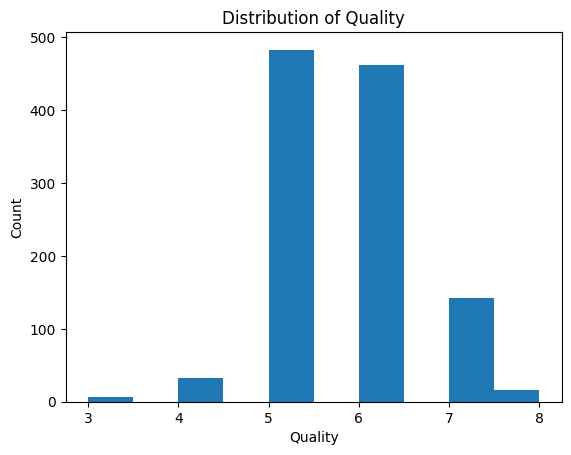

In [ ]:
X_data_w["quality"].sort_index().plot(kind='hist')
plt.title('Distribution of Quality')
plt.xlabel('Quality')
plt.ylabel('Count')

In [6]:
Y_data_w = X_data_w['quality']
classes, classes_indices = np.unique(Y_data_w, return_inverse=True)
Y_data_w_n = np.eye(len(classes))[classes_indices]
X_data_w_n = X_data_w.drop('quality',axis=1)

# X_data_w_n = preprocessing.normalize(X_data_w_n,axis=0)
# X_data_w_n = std.fit_transform(X=X_data_w_n)

X_train_t, X_test_w, Y_train_t, Y_test_w = train_test_split(X_data_w_n,Y_data_w_n,test_size=0.15,random_state=1)
X_train_w, X_valid_w,Y_train_w, Y_valid_w = train_test_split(X_train_t,Y_train_t,test_size=0.176,random_state=1)

std = preprocessing.StandardScaler()
X_train_w = std.fit_transform(X=X_train_w)
X_test_w = std.fit_transform(X=X_test_w)
X_valid_w = std.fit_transform(X=X_valid_w)

print("Shape of the train, test and validaton data:",X_train_w.shape,X_test_w.shape,X_valid_w.shape)
print("Shape of the train, test and validaton label:",Y_train_w.shape,Y_test_w.shape,Y_valid_w.shape)

Shape of the train, test and validaton data: (800, 11) (172, 11) (171, 11)
Shape of the train, test and validaton label: (800, 6) (172, 6) (171, 6)


### Decision Tree classifier

In [ ]:
#Decision Trees classifier
def Decision_trees_classifier(hy_param,X_train, Y_train, X_valid, Y_valid):
    model = tree.DecisionTreeClassifier(max_depth=hy_param[0], max_features=hy_param[1],criterion=hy_param[2],random_state=12)
    model = model.fit(X_train, Y_train)
    predicted_value = model.predict(X_valid)

    predicted_value = np.argmax(predicted_value, axis=1)
    Actual_value = np.argmax(Y_valid, axis=1)

    Accuracy = np.sum(predicted_value==Actual_value)/len(X_valid)
    F1_score_mi = f1_score(Actual_value, predicted_value, average='micro')
    F1_score_ma = f1_score(Actual_value, predicted_value, average='macro')

    return Accuracy, F1_score_mi, F1_score_ma

In [ ]:
# Decision trees Hyper parameter tuning
from itertools import product
h_param = {
        'Max_depth' : [3,5,10,20,30],
        'Max_features' : [3,5,7,9,11],
        'criterion' : ['gini', 'entropy']
        }
hyper_param = list(product(*h_param.values()))
accuracy = []
f1_micro = []
f1_macro = []
for i in hyper_param:
    acc, f1_mi, f1_ma = Decision_trees_classifier(i,X_train_w, Y_train_w, X_valid_w, Y_valid_w)
    accuracy.append(acc)
    f1_micro.append(f1_mi)
    f1_macro.append(f1_ma)


Hayper parameter index number for maximum accuracy: 23
The best hyperparameters of the Decision tree: (10, 5, 'entropy') 
The accuracy: 0.5730994152046783 
The F1-micro: 0.5730994152046783 
The F1-macro: 0.3228340152997687


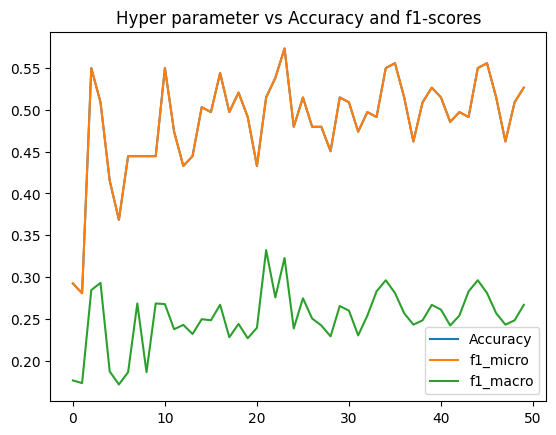

In [ ]:
plt.plot(np.arange(len(accuracy)),accuracy,label="Accuracy")
plt.plot(np.arange(len(accuracy)),f1_micro, label="f1_micro")
plt.plot(np.arange(len(accuracy)),f1_macro,label="f1_macro")
plt.title("Hyper parameter vs Accuracy and f1-scores")
plt.legend()
Index_of_best_hyper_param = np.argmax(accuracy)
print("Hayper parameter index number for maximum accuracy:",Index_of_best_hyper_param)
print("The best hyperparameters of the Decision tree:",hyper_param[Index_of_best_hyper_param],
"\nThe accuracy:",accuracy[Index_of_best_hyper_param],"\nThe F1-micro:",f1_micro[Index_of_best_hyper_param],
"\nThe F1-macro:",f1_macro[Index_of_best_hyper_param])

Note: The accuracy and f1-score micro have same values due to class unblancing in the data.
For the best hyperparameter value the f-1 score macro value had taken in the account.

### Logistic regression (Classifier)

In [7]:
class multinomial_logistic_regression:
    def __init__(self, learning_rate = 0.01, epoch = 100,thresold_value = 0.000001,random_state=None):
        self.learning_rate = learning_rate
        self.epoch = epoch
        self.loss = []
        self.thresold_value = thresold_value
        self.random_state = random_state
    def fit(self, X_train, Y_train):
        np.random.seed(self.random_state)
        Y_train = np.argmax(Y_train,axis=1)
        self.classes, classes_indices = np.unique(Y_train, return_inverse=True)
        X_train = np.insert(X_train,0,1,axis=1)
        self.weights = np.full((len(self.classes), X_train.shape[1]),0.001)  #kxm
        #one-hot
        Y_one_hot = np.eye(len(self.classes))[classes_indices]
        #fit
        i = 0
        while(i<self.epoch):
            p_k = self.predic_prob_(X_train)   #find softmax
            self.loss.append(self.cross_entropy(Y_one_hot,p_k))
            error = Y_one_hot - p_k
            dj_dw = np.dot(error.T, X_train)
            update_w = dj_dw*self.learning_rate
            self.weights += update_w

            if np.abs(update_w).max()<self.thresold_value:
                break

            i+=1

    def predic_prob_(self,X):
        z = np.dot(X,self.weights.T).reshape(-1,len(self.classes))
        softmax = np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1,1)
        return softmax               #nxk

    def predict(self, X_test,internal = 0):
        if internal==0:
            X_test = np.insert(X_test,0,1,axis=1)
        p_prob = self.predic_prob_(X_test)
        # return np.vectorize(lambda c: self.classes[c])(np.argmax(p_prob, axis=1))
        return p_prob

    def cross_entropy(self, Y, p_probs):
        return -1 * np.mean(Y * np.log(p_probs))

    # def Accuracy(self, X_test, y):
    #     X_test = np.insert(X_test,0,1,axis=1)
    #     return np.mean(self.predict(X_test,internal=1) == y)

Accuracy: 0.6198830409356725


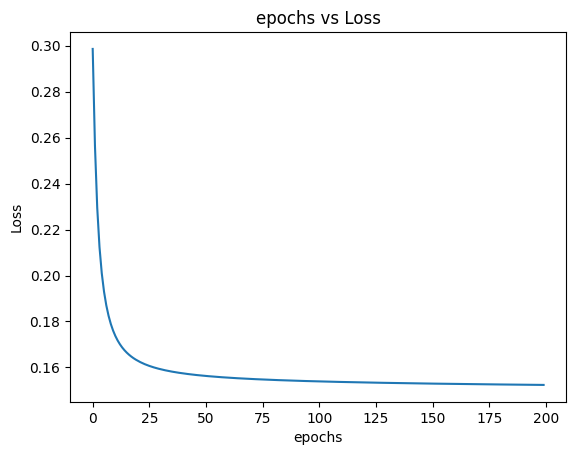

In [ ]:
model = multinomial_logistic_regression(learning_rate = 0.001, epoch = 200)
model.fit(X_train_w,Y_train_w)

predicted_value = model.predict(X_valid_w)
predicted_value = np.argmax(predicted_value, axis=1)
Actual_value = np.argmax(Y_valid_w, axis=1)
acc = np.sum(predicted_value==Actual_value)/len(X_valid_w)

plt.plot(model.loss)
plt.title("epochs vs Loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
print("Accuracy:",acc)

In [ ]:
Y_train_w_n = np.argmax(Y_train_w,axis=1)
Y_valid_w_n = np.argmax(Y_valid_w,axis=1)

h_param = {
        'learning_rate': [0.1,0.05,0.01,0.005,0.001,0.0005,0.0001],
        'epochs' : [1500,2000,2500,3000,3500]
        }

hyper_param = list(product(*h_param.values()))
accuracy = []
f1_micro = []
f1_macro = []
loss = []
for i in hyper_param:
        model = multinomial_logistic_regression(learning_rate = i[0], epoch = i[1])
        model.fit(X_train_w,Y_train_w)

        predicted_value = model.predict(X_valid_w)
        predicted_value = np.argmax(predicted_value, axis=1)
        Actual_value = np.argmax(Y_valid_w, axis=1)
        acc = np.sum(predicted_value==Actual_value)/len(X_valid_w)
        l = np.mean(model.loss)
        # acc = model.Accuracy(X_valid_w,Y_valid_w_n)
        # predicted_value = model.predict(X_valid_w)
        f1_mi = f1_score(Actual_value, predicted_value, average='micro')
        f1_ma = f1_score(Actual_value, predicted_value, average='macro')

        accuracy.append(acc)
        f1_micro.append(f1_mi)
        f1_macro.append(f1_ma)
        loss.append(l)

Hayper parameter index number for maximum Accuracy: 20
The best hyperparameters of the Logistic Regrassion classification: (0.001, 1500) 
The accuracy: 0.6198830409356725 
The F1-micro: 0.6198830409356725 
The F1-macro: 0.31058201058201057 
The Loss: 0.15151451687895992


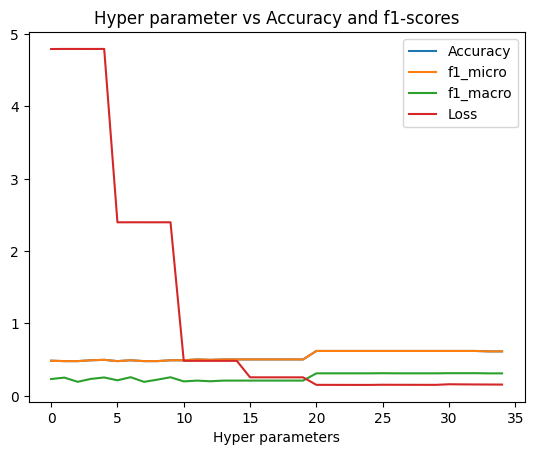

In [ ]:
plt.plot(np.arange(len(accuracy)),accuracy,label="Accuracy")
plt.plot(np.arange(len(f1_micro)),f1_micro, label="f1_micro")
plt.plot(np.arange(len(f1_macro)),f1_macro,label="f1_macro")
plt.plot(np.arange(len(loss)),loss,label="Loss")
plt.title("Hyper parameter vs Accuracy and f1-scores")
plt.xlabel("Hyper parameters")
plt.legend()
Index_of_best_hyper_param = np.argmax(accuracy)
print("Hayper parameter index number for maximum Accuracy:",Index_of_best_hyper_param)
print("The best hyperparameters of the Logistic Regrassion classification:",hyper_param[Index_of_best_hyper_param],
"\nThe accuracy:",accuracy[Index_of_best_hyper_param],"\nThe F1-micro:",f1_micro[Index_of_best_hyper_param],
"\nThe F1-macro:",f1_macro[Index_of_best_hyper_param],
"\nThe Loss:",loss[Index_of_best_hyper_param],)

Note: The accuracy and f1-score micro have same values due to class unblancing in the data.
For the best hyperparameter value the f-1 score macro value had taken in the account.

### MLP Classification

In [8]:
class multi_layer_perceptron_classification:
    def __init__(self, learning_rate, activation_function,input_size,output_size, hidden_layers = [8], optimiser = 'MBGD',batch_size = 32,epochs=500, random_state=None):
        self.learning_rate = learning_rate
        self.activation_function = activation_function
        self.input_size = input_size              # no of features in the input dataset
        self.output_size = output_size
        self.hidden_layers = hidden_layers
        self.optimiser = optimiser
        self.batch_size = batch_size
        self.epochs = epochs
        self.random_state = random_state
        self.weights, self.biases = self.intialize_weight_and_bias(self.random_state)
        self.loss = None
        self.losses = []

    def fit(self,X,y):
        np.random.seed(self.random_state)
        if self.output_size == 1:
            loss_function = self.binary_cross_entropy_loss
        else:
            loss_function = self.categorical_cross_entropy_loss

        for epoch in range(self.epochs):

            if self.optimiser=='BGD':
                output, activations = self.forward(X)
                self.backward(X, y, output, activations)

            elif self.optimiser=='MBGD':
                output = np.empty((0, self.output_size))
                num_batches = X.shape[0] // self.batch_size
                X_batches = np.array_split(X, num_batches)
                Y_batches = np.array_split(y,num_batches)

                for i in range(num_batches):
                    X_batche = X_batches[i]
                    Y_batche = Y_batches[i]
                    out, activations = self.forward(X_batche)
                    self.backward(X_batche, Y_batche, out, activations)
                    output = np.append(output, out, axis=0)

            elif self.optimiser=='SGD':
                output = np.empty((0, self.output_size))
                num_batches = X.shape[0] // 1
                X_batches = np.array_split(X, num_batches)
                Y_batches = np.array_split(y,num_batches)
                for i in range(X.shape[0]):
                    out, activations = self.forward(X_batches[i])
                    self.backward(X_batches[i], Y_batches[i], out, activations)
                    output = np.append(output, out, axis=0)

            else:
                raise ValueError("Invalid optimizer!")
            self.loss = loss_function(y, output)
            self.losses.append(self.loss)
            # if epoch % 100 == 0:
            #     print(f"Epoch {epoch}, Loss: {loss}")

    def intialize_weight_and_bias(self,r):
        weights = []
        biases = []
        np.random.seed(r)
        weight = np.random.randn(self.input_size, self.hidden_layers[0])
        bias = np.zeros((self.hidden_layers[0],1))
        weights.append(weight)
        biases.append(bias)
        np.random.seed(42)

        for i in range(1, len(self.hidden_layers)):
            weight = np.random.randn(self.hidden_layers[i-1], self.hidden_layers[i])
            bias = np.zeros((self.hidden_layers[i],1))
            weights.append(weight)
            biases.append(bias)

        weight = np.random.randn(self.hidden_layers[-1],self.output_size)
        bias = np.zeros((self.output_size,1))
        weights.append(weight)
        biases.append(bias)

        return weights, biases

    def forward(self, X_train):
        activations = []  #output of layears
        layer_input = X_train #inpute of all layears

        for i in range(len(self.hidden_layers)):
            weighted_sum = np.dot(layer_input ,self.weights[i])
            weighted_sum_n = weighted_sum + np.array(self.biases[i]).T     #check
            activation = self.activation_func(weighted_sum_n)

            activations.append(activation)
            layer_input = activation

        output = np.dot(layer_input,self.weights[-1])
        output += np.array(self.biases[-1]).T   #check
        if self.output_size == 1:
            output = self.sigmoid(output)
        else:
            output = self.softmax(output)

        return output, activations

    def softmax(self,X):
        exp_X = np.exp(X - np.max(X))  # Stability fix
        return exp_X / np.sum(exp_X, axis=1, keepdims=True).reshape(-1,1)

    def activation_func(self, weighted_sum):
        if self.activation_function == 'ReLU':
            return np.maximum(0, weighted_sum)

        elif (self.activation_function == 'Sigmoid'):
            return 1 / (1 + np.exp(-weighted_sum))

        elif (self.activation_function == 'Tanh'):
            return np.tanh(weighted_sum)

        else:
            raise ValueError("Invalid Activation Function.")
            return

    def activation_func_derivative(self,X):
        if self.activation_function == 'ReLU' :
            return (X > 0).astype(float)

        elif (self.activation_function == 'Sigmoid'):
            return X * (1 - X)

        elif (self.activation_function == 'Tanh'):
            return (1 - X**2)

        else:
            raise ValueError("Invalid Activation Function.")
            return

    def backward(self,X,Y, output, activations):
        gradient_weights = []
        gradient_biases = []

        if self.output_size==1:
            error_delta = output-Y
        else:
            error_delta = output-Y
        gradient_weight = np.dot(activations[-1].T,error_delta)
        gradient_bias = np.sum(error_delta.T,axis=1,keepdims=True)

        gradient_weights.append(gradient_weight)
        gradient_biases.append(gradient_bias)

        for i in range(len(self.hidden_layers), 0, -1):
            error = np.dot( error_delta, self.weights[i].T)

            activation_derivative = self.activation_func_derivative(activations[i-1])

            error_delta = error * activation_derivative
            gradient_weight = np.dot(activations[i - 2].T, error_delta) if (i-1) > 0 else np.dot(X.T,error_delta)
            gradient_bias = np.sum(error_delta.T, axis=1, keepdims=True)

            gradient_weights.append(gradient_weight)
            gradient_biases.append(gradient_bias)

        for i in range(len(self.hidden_layers)+1):
            self.weights[i] -= self.learning_rate * gradient_weights[len(self.hidden_layers)-i]
            self.biases[i] -= self.learning_rate * gradient_biases[len(self.hidden_layers)-i]
        # print(self.weights[1])
    def binary_cross_entropy_loss(self, y_true, y_pred):
        epsilon = 1e-14  # Small constant to prevent log(0)
        return -np.mean(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))

    def categorical_cross_entropy_loss(self, y_true, y_pred):
        epsilon = 1e-14  # Small constant to prevent log(0)
        return -np.sum(y_true * np.log(y_pred + epsilon)) / len(y_true)

    def predict(self,X_test):
        output, _ = self.forward(X_test)
        return output


Accuracy: 0.5847953216374269


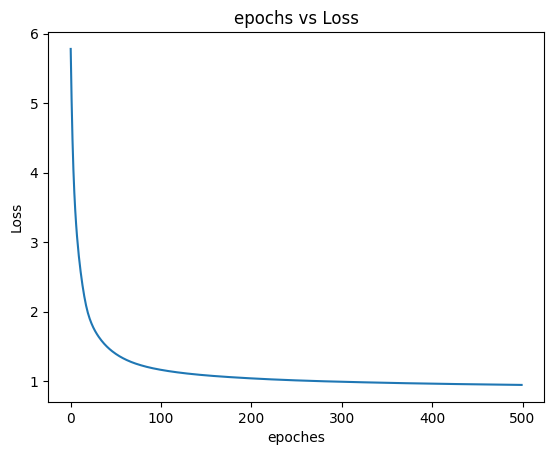

In [ ]:
model = multi_layer_perceptron_classification(learning_rate=0.0001, activation_function = 'ReLU',optimiser = 'MBGD',input_size = 11,output_size = 6, hidden_layers = [8])
model.fit(X_train_w,Y_train_w)

predicted_value = model.predict(X_valid_w)
predicted_value = np.argmax(predicted_value, axis=1)
Actual_value = np.argmax(Y_valid_w, axis=1)
acc = np.sum(predicted_value==Actual_value)/len(X_valid_w)

plt.plot(model.losses)
plt.title("epochs vs Loss")
plt.xlabel("epoches")
plt.ylabel("Loss")

print("Accuracy:",acc)

In [ ]:
h_param = {
        'learning_rate': [0.001,0.0001],
        'epochs' : [1000,1500,2000],
        'hidden_layer_neurons': [[8],[10],[13]],
        'activation_functions' : ['ReLU', 'Sigmoid', 'Tanh'],
        'optimization_techniques' : ['BGD', 'MBGD']
        }

hyper_param = list(product(*h_param.values()))
accuracy = []
f1_micro = []
f1_macro = []
loss = []
for i in hyper_param:
        model = multi_layer_perceptron_classification(learning_rate=i[0], hidden_layers = i[2],activation_function = i[3],optimiser=i[4],input_size = 11,output_size = 6,epochs=i[1])
        model.fit(X_train_w,Y_train_w)

        predicted_value = model.predict(X_valid_w)
        predicted_value = np.argmax(predicted_value, axis=1)
        Actual_value = np.argmax(Y_valid_w, axis=1)
        acc = np.sum(predicted_value==Actual_value)/len(X_valid_w)
        l = np.mean(model.losses)
        f1_mi = f1_score(Actual_value, predicted_value, average='micro')
        f1_ma = f1_score(Actual_value, predicted_value, average='macro')

        accuracy.append(acc)
        f1_micro.append(f1_mi)
        f1_macro.append(f1_ma)
        loss.append(l)

Hayper parameter index number for maximum Accuracy: 67
The best hyperparameters of the Logistic Regrassion classification: (0.0001, 1000, [13], 'ReLU', 'MBGD') 
The accuracy: 0.6608187134502924 
The F1-micro: 0.6608187134502924 
The F1-macro: 0.32847707847707847 
The Loss: 1.0969553310390674


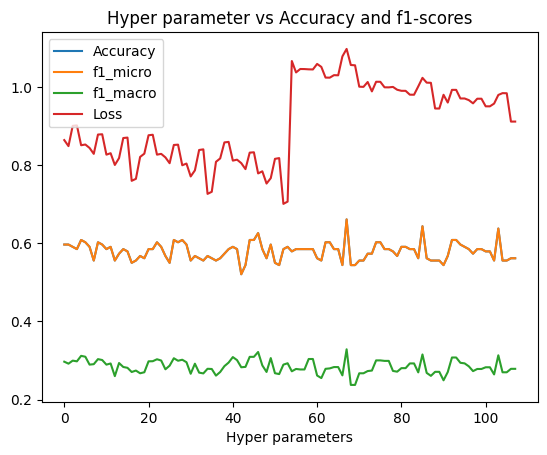

In [ ]:
plt.plot(np.arange(len(accuracy)),accuracy,label="Accuracy")
plt.plot(np.arange(len(f1_micro)),f1_micro, label="f1_micro")
plt.plot(np.arange(len(f1_macro)),f1_macro,label="f1_macro")
plt.plot(np.arange(len(loss)),loss,label="Loss")
plt.title("Hyper parameter vs Accuracy and f1-scores")
plt.xlabel("Hyper parameters")
plt.legend()
Index_of_best_hyper_param = np.argmax(accuracy)
print("Hayper parameter index number for maximum Accuracy:",Index_of_best_hyper_param)
print("The best hyperparameters of the Logistic Regrassion classification:",hyper_param[Index_of_best_hyper_param],
"\nThe accuracy:",accuracy[Index_of_best_hyper_param],"\nThe F1-micro:",f1_micro[Index_of_best_hyper_param],
"\nThe F1-macro:",f1_macro[Index_of_best_hyper_param],
"\nThe Loss:",loss[Index_of_best_hyper_param],)

## 3.2 Bagging for classification

In [9]:
class BaggingClassifier:
    def __init__(self, base_estimator, n_estimators=10, max_samples=1.0, random_state=None, bootstrap=True, voting='hard'):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.max_samples = max_samples
        self.random_state = random_state
        self.bootstrap = bootstrap
        self.voting = voting
        self.estimators = []

    def fit(self, X, y):
        np.random.seed(self.random_state)
        self.estimators = []

        for _ in range(self.n_estimators):
            # Randomly sample a subset of the training data
            if self.bootstrap:
                sample_indices = np.random.choice(len(X), size=int(self.max_samples * len(X)), replace=True)
            else:
                sample_indices = np.random.choice(len(X), size=int(self.max_samples * len(X)), replace=False)

            X_sampled = X[sample_indices]
            y_sampled = y[sample_indices]

            # Create a new instance of the base estimator
            estimator = self.base_estimator

            # Train the base estimator on the sampled data
            estimator.fit(X_sampled, y_sampled)

            self.estimators.append(estimator)

    def predict(self, X):
        # Make predictions using each base estimator
        predictions = [estimator.predict(X) for estimator in self.estimators]

        if self.voting == 'hard':
            ensemble_predictions = np.array(predictions)
            max_indices = np.argmax(ensemble_predictions, axis=2)
            # Create a binary array with 1 at the maximum index and 0 elsewhere
            binary_array = np.zeros_like(ensemble_predictions)
            for i in range(ensemble_predictions.shape[0]):
                for j in range(ensemble_predictions.shape[1]):
                    binary_array[i, j, max_indices[i, j]] = 1

            ensemble_predictions = binary_array
            p = np.mean(ensemble_predictions,axis=0)
            final_predictions = np.argmax(p, axis=1)

        elif self.voting == 'soft':
            # Use soft voting for classification (average probabilities)
            ensemble_probabilities = np.array(predictions).mean(axis=0)
            final_predictions = np.argmax(ensemble_probabilities, axis=1)

        return final_predictions

#### 3.2.2
For ease, assume the best hyper-parameters from sub-task 1 and train
ensemble models across all combinations of parameters specified above
and report the best performing models

In [ ]:
h_param = {
        'base_estimators': [tree.DecisionTreeClassifier(max_depth=20, max_features=7,criterion='entropy',random_state=12),
multinomial_logistic_regression(learning_rate = 0.001, epoch = 1500),
multi_layer_perceptron_classification(learning_rate=0.0001, activation_function = 'ReLU',input_size = 11,output_size = 6, hidden_layers = [13],epochs = 1000,optimiser='MBGD')],
        'num_estimators' : [10, 20, 30],
        'sample_sizes': [0.15, 0.25, 0.5, 0.75, 1.0],
        'bootstrap_options' : [False,True],
        'voting_mechanisms' : ['hard', 'soft']
        }

hyper_param = list(product(*h_param.values()))
accuracy = []
accuracy_DT = []
accuracy_LR = []
accuracy_MLP = []
j = 0
for i in hyper_param:
        bagging_model = BaggingClassifier(base_estimator = i[0], n_estimators=i[1], max_samples=i[2], random_state=42, bootstrap=i[3], voting=i[4])
        bagging_model.fit(X_train_w, Y_train_w)

        predicted_value = bagging_model.predict(X_valid_w)
        # predicted_value = np.argmax(predicted_value, axis=1)
        Actual_value = np.argmax(Y_valid_w, axis=1)
        acc = np.sum(predicted_value==Actual_value)/len(X_valid_w)
        accuracy.append(acc)
        if j//60 == 0:
                accuracy_DT.append(acc)
        if j//60 == 1:
                accuracy_LR.append(acc)
        if j//60 == 2:
                accuracy_MLP.append(acc)
        j = j+1


In [ ]:
max_accuracy_index = np.argmax(accuracy)
print(f"The hyperparameters index for the maximum accuracy = {max_accuracy_index},\nThe hyperparameters for the maximum accuracy = {hyper_param[max_accuracy_index]},\nThe max accuracy = {accuracy[max_accuracy_index]}")
print("\n")

max_accuracy_index_DT = np.argmax(accuracy_DT)
print(f"The hyperparameters index for the maximum accuracy for Decision trees classifier = {max_accuracy_index_DT},\nThe hyperparameters for the maximum accuracy for Decision trees classifier = {hyper_param[max_accuracy_index_DT]},\nThe max accuracy for Decision trees classifier = {accuracy_DT[max_accuracy_index_DT]}")
print("\n")

max_accuracy_index_LR = np.argmax(accuracy_LR)
print(f"The hyperparameters index for the maximum accuracy for Logistic Regression = {max_accuracy_index_LR + 60},\nThe hyperparameters for the maximum accuracy for Logistic Regression = {hyper_param[max_accuracy_index_LR + 60]},\nThe max accuracy for Logistic Regression = {accuracy_LR[max_accuracy_index_LR]}")
print("\n")

max_accuracy_index_MLP = np.argmax(accuracy_MLP)
print(f"The hyperparameters index for the maximum accuracy for MLP = {max_accuracy_index_MLP + 120},\nThe hyperparameters for the maximum accuracy for MLP = {hyper_param[max_accuracy_index_MLP + 120]},\nThe max accuracy for MLP = {accuracy_MLP[max_accuracy_index_MLP]}")

The hyperparameters index for the maximum accuracy = 76,
The hyperparameters for the maximum accuracy = (<__main__.multinomial_logistic_regression object at 0x793ade9ff010>, 10, 1.0, False, 'hard'),
The max accuracy = 0.6198830409356725


The hyperparameters index for the maximum accuracy for Decision trees classifier = 0,
The hyperparameters for the maximum accuracy for Decision trees classifier = (DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features=7,
                       random_state=12), 10, 0.15, False, 'hard'),
The max accuracy for Decision trees classifier = 0.5614035087719298


The hyperparameters index for the maximum accuracy for Logistic Regression = 76,
The hyperparameters for the maximum accuracy for Logistic Regression = (<__main__.multinomial_logistic_regression object at 0x793ade9ff010>, 10, 1.0, False, 'hard'),
The max accuracy for Logistic Regression = 0.6198830409356725


The hyperparameters index for the maximum accuracy for MLP = 120,
The hyper

Text(0, 0.5, 'Accuracy')

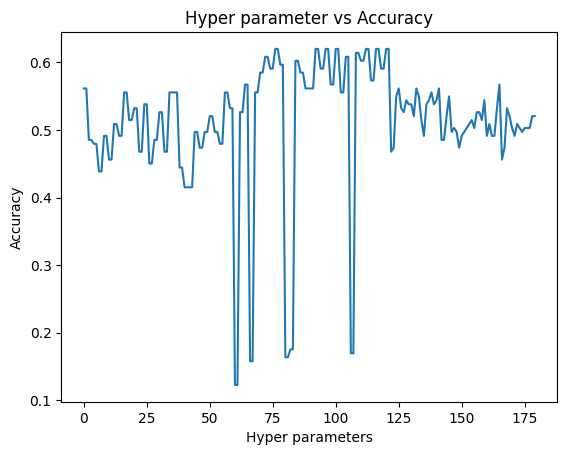

In [ ]:
plt.plot(np.array(accuracy))
plt.title("Hyper parameter vs Accuracy")
plt.xlabel("Hyper parameters")
plt.ylabel("Accuracy")


#### 3.2.3
Plot a heatmap for the accuracies obtained by each class of base estimator
models across Fraction of Samples and Number of Estimators (Keep other
parameters constant and to your choice)

In [ ]:
h_param = {
        'base_estimators': [tree.DecisionTreeClassifier(max_depth=20, max_features=7,criterion='entropy',random_state=12),
multinomial_logistic_regression(learning_rate = 0.001, epoch = 1500),
multi_layer_perceptron_classification(learning_rate=0.0001, activation_function = 'ReLU',input_size = 11,output_size = 6, hidden_layers = [13],epochs = 1000,optimiser='MBGD')],
        'num_estimators' : [10, 20, 30],
        'sample_sizes': [0.15, 0.25, 0.5, 0.75, 1.0],
        'bootstrap_options' : [False],
        'voting_mechanisms' : ['hard']
        }

hyper_param = list(product(*h_param.values()))
accuracy_n = []
accuracy_DT_n = []
accuracy_LR_n = []
accuracy_MLP_n= []
j = 0
for i in hyper_param:
        bagging_model = BaggingClassifier(base_estimator = i[0], n_estimators=i[1], max_samples=i[2], random_state=42, bootstrap=i[3], voting=i[4])
        bagging_model.fit(X_train_w, Y_train_w)

        predicted_value = bagging_model.predict(X_valid_w)
        # predicted_value = np.argmax(predicted_value, axis=1)
        Actual_value = np.argmax(Y_valid_w, axis=1)
        acc = np.sum(predicted_value==Actual_value)/len(X_valid_w)
        accuracy_n.append(acc)
        if j//15 == 0:
                accuracy_DT_n.append(acc)
        if j//15 == 1:
                accuracy_LR_n.append(acc)
        if j//15 == 2:
                accuracy_MLP_n.append(acc)
        j = j+1

(3, 5, 3)


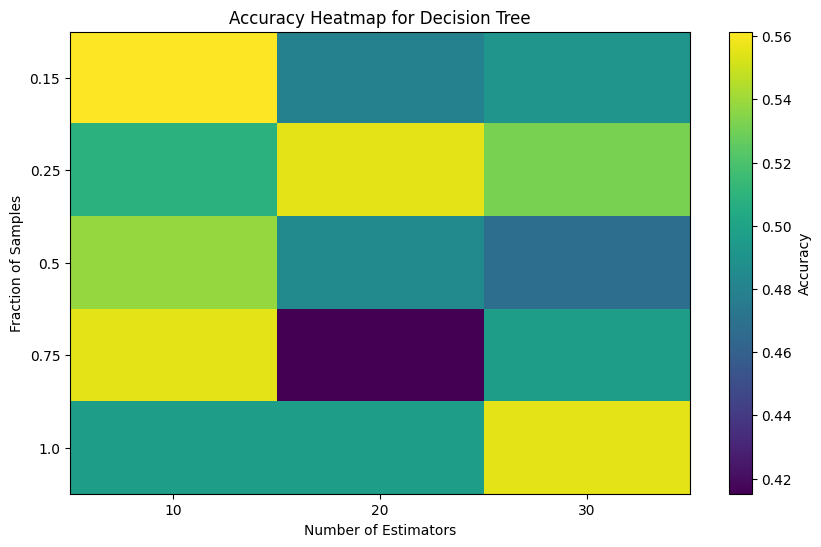

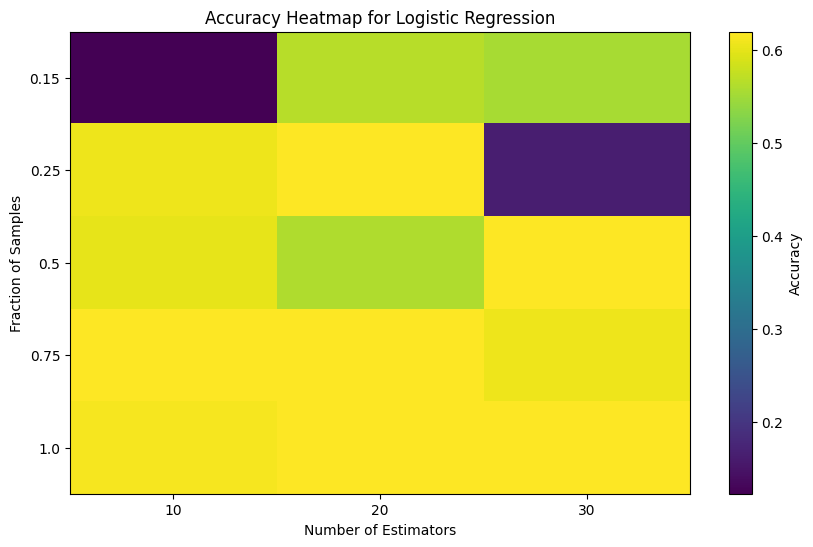

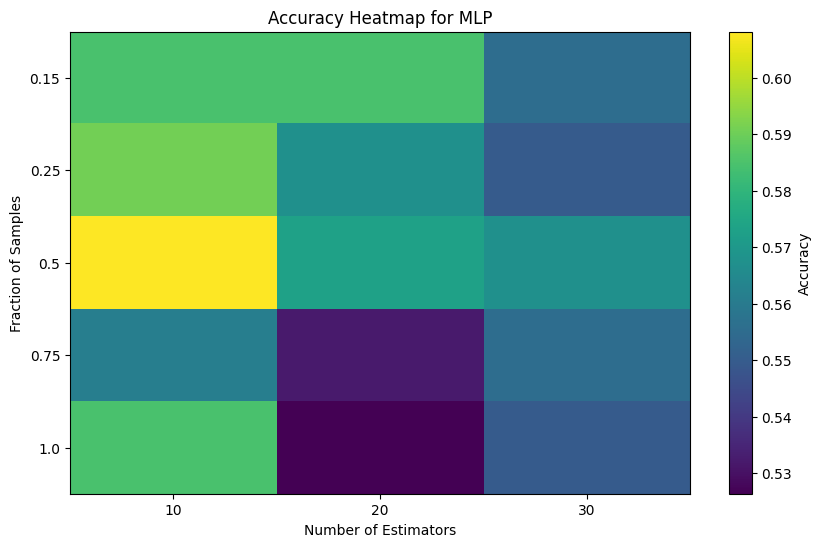

In [ ]:

base_ests = ['Decision Tree', 'Logistic Regression', 'MLP']
fraction_samples = [0.15, 0.25, 0.5, 0.75, 1.0]
num_estimators = [10, 20, 30]
accuracy_scores = np.array([accuracy_DT_n, accuracy_LR_n, accuracy_MLP_n]).reshape(3,5,3)
print(accuracy_scores.shape)
for i in range(len(base_ests)):
    # Create the heatmap
    plt.figure(figsize=(10, 6))
    plt.imshow(accuracy_scores[i], cmap='viridis', aspect='auto')

    plt.colorbar(label='Accuracy')
    plt.xticks(np.arange(len(num_estimators)), num_estimators)
    plt.yticks(np.arange(len(fraction_samples)), fraction_samples)
    plt.xlabel('Number of Estimators')
    plt.ylabel('Fraction of Samples')
    plt.title(f'Accuracy Heatmap for {base_ests[i]}')

    plt.show()

#### 3.2.4
Compare the performance of each model in List 1 models with the bestperforming ensemble model of the same class with a single side-by-side
histogram

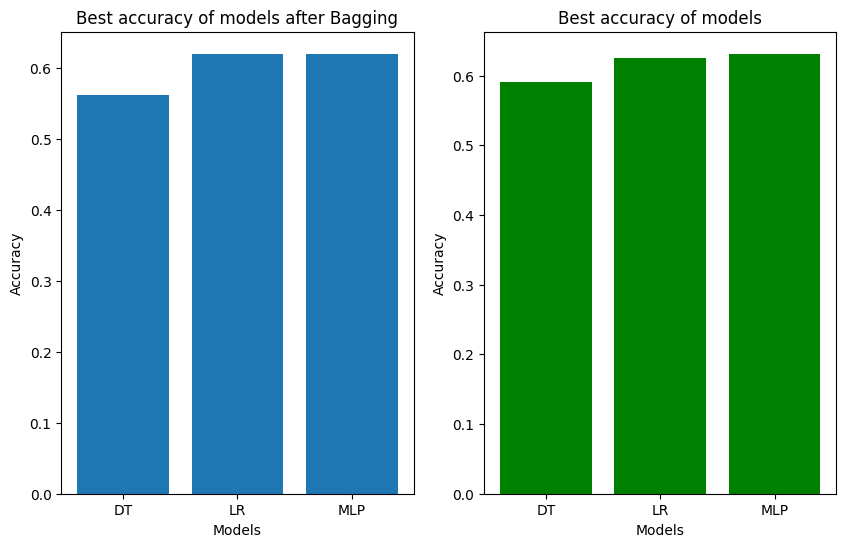

In [ ]:
Best_acc_bagg = np.array([accuracy[max_accuracy_index_DT],accuracy[max_accuracy_index_LR+60],accuracy[max_accuracy_index_MLP+120]])
Best_acc_models = np.array([0.5906,0.6257,0.6315])
list_of_models  =['DT','LR','MLP']

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(list_of_models,Best_acc_bagg)
plt.title('Best accuracy of models after Bagging')
plt.xlabel('Models')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.bar(list_of_models,Best_acc_models, color='green')
plt.title('Best accuracy of models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

## 3.3 Stacking for classification

In [114]:
class StackingBlendingClassifier:

  def __init__(self, base_estimators, meta_estimator, stack_method = 'blending',random_state = None):
      self.base_estimators = base_estimators
      self.meta_estimator = meta_estimator
      self.stack_method = stack_method
      self.random_state = random_state

  def fit(self, X_train, Y_train, X_hold, Y_hold,n_fold=4):
    np.random.seed(self.random_state)
    # self.estimators = []
    hold_pred = []
    self.base_estimators_t = []

    if self.stack_method=='blending':
      hold_preds = np.empty((0,1),float)
      is_array_empty = True
      for estimator in self.base_estimators:
        estimator.fit(X_train, Y_train)
        if is_array_empty == True:
          hold_preds = np.append(hold_preds, estimator.predict(X_hold), axis=None)
          is_array_empty = False
          hold_preds = np.array(hold_preds).reshape(len(X_hold),-1)
        else:
          hold_preds = np.append(hold_preds, estimator.predict(X_hold), axis=1)

        self.base_estimators_t.append(estimator)
      self.meta_estimator.fit(hold_preds,Y_hold)

    elif self.stack_method == 'stacking':
      folds=MultilabelStratifiedKFold(n_splits=n_fold)
      train_preds=np.empty((0,1),float)
      is_empty_array2 = True
      for estimator in self.base_estimators:
        train_pred=np.empty((0,1),float)
        Y_train_pred=np.empty((0,1),float)
        is_empty_array1 = True

        for train_indices,val_indices in folds.split(X_train,Y_train):
          x_train,x_val=X_train[train_indices],X_train[val_indices]
          y_train,y_val=Y_train[train_indices],Y_train[val_indices]
          estimator.fit(x_train,y_train)
          if is_empty_array1==True:
            train_pred=np.append(train_pred,estimator.predict(x_val),axis=None)
            Y_train_pred=np.append(Y_train_pred,y_val,axis=None)
            is_empty_array1 = False
            train_pred = np.array(train_pred).reshape(len(x_val),-1)
            Y_train_pred = np.array(Y_train_pred).reshape(len(x_val),-1)
          else:
            train_pred=np.append(train_pred,estimator.predict(x_val),axis=0)
            Y_train_pred=np.append(Y_train_pred,y_val,axis=0)

        if is_empty_array2==True:
          train_preds = np.append(train_preds, train_pred, axis=None)
          is_empty_array2=False
          train_preds = np.array(train_preds).reshape(len(X_train),-1)
        else:
          train_preds = np.append(train_preds, train_pred, axis=1)

        self.base_estimators_t.append(estimator)
      self.meta_estimator.fit(train_preds,Y_train_pred)

    else:
      raise ValueError("Invalid Stacking method.")

  def predict(self,X_test):
    test_preds = np.empty((0,1),float)
    is_array_empty = True
    for estimator in self.base_estimators_t:
      if is_array_empty == True:
        test_preds = np.append(test_preds, estimator.predict(X_test), axis=None)
        is_array_empty = False
        test_preds = np.array(test_preds).reshape(len(X_test),-1)
      else:
        test_preds = np.append(test_preds, estimator.predict(X_test), axis=1)

    return self.meta_estimator.predict(test_preds)


1. Design a function that performs the bagging methodology of ensemble
learning by taking as input the following parameters:<br>
• Level-0 estimators:<br>
– List 1 Models<br>
• Level-1 estimators:<br>
– Logistic and Linear Regressor for classification and regression
respectively<br>
– Decision Tree<br>
• Stacking Methodologies:<br>
– Stacking<br>
– Blending<br>

2. For ease, assume the best hyper-parameters from sub-task 1 and train
ensemble models across all combinations of parameters specified above
and report the best-performing models.

In [115]:
random_state = 10    #10 ,19
base_estimators= [tree.DecisionTreeClassifier(max_depth=20, max_features=7,criterion='entropy',random_state=random_state),
                  multinomial_logistic_regression(learning_rate = 0.001, epoch = 1500,random_state=random_state),
                  multi_layer_perceptron_classification(learning_rate=0.0001, activation_function = 'ReLU',input_size = 11,output_size = 6, hidden_layers = [13],epochs = 1000,optimiser='MBGD',random_state=random_state)]
h_param = {
        'meta_estimator' : [tree.DecisionTreeClassifier(max_depth=20, max_features=7,criterion='entropy',random_state=random_state),
                  multinomial_logistic_regression(learning_rate = 0.001, epoch = 1500,random_state=random_state)],
        'stack_method': ['stacking','blending']
        }

hyper_param = list(product(*h_param.values()))
accuracy = []
accuracy_DT = []
accuracy_LR = []
accuracy_MLP = []
j = 0
for i in hyper_param:
        stacking_model = StackingBlendingClassifier(base_estimators = base_estimators , meta_estimator = i[0], stack_method = i[1],random_state=random_state)
        stacking_model.fit(X_train_w, Y_train_w, X_valid_w, Y_valid_w)

        predicted_value = stacking_model.predict(X_test_w)
        predicted_value = np.argmax(predicted_value, axis=1)
        Actual_value = np.argmax(Y_test_w, axis=1)
        acc = np.sum(predicted_value==Actual_value)/len(X_test_w)
        accuracy.append(acc)
        print(f"The hyperparameters index = {j},\nThe hyperparameters = {hyper_param[j]},\nThe accuracy = {accuracy[j]}")
        print("\n")
        j = j+1
max_accuracy_index = np.argmax(accuracy)
print(f"The hyperparameters index for the maximum accuracy = {max_accuracy_index},\nThe hyperparameters for the maximum accuracy = {hyper_param[max_accuracy_index]},\nThe max accuracy = {accuracy[max_accuracy_index]}")


The hyperparameters index = 0,
The hyperparameters = (DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features=7,
                       random_state=10), 'stacking'),
The accuracy = 0.47674418604651164


The hyperparameters index = 1,
The hyperparameters = (DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features=7,
                       random_state=10), 'blending'),
The accuracy = 0.563953488372093


The hyperparameters index = 2,
The hyperparameters = (<__main__.multinomial_logistic_regression object at 0x7cf73acd7940>, 'stacking'),
The accuracy = 0.6337209302325582


The hyperparameters index = 3,
The hyperparameters = (<__main__.multinomial_logistic_regression object at 0x7cf73acd7940>, 'blending'),
The accuracy = 0.6802325581395349


The hyperparameters index for the maximum accuracy = 3,
The hyperparameters for the maximum accuracy = (<__main__.multinomial_logistic_regression object at 0x7cf73acd7940>, 'blending'),
The max accuracy = 0.6802325581395

3. Compare the accuracies and the training time of the best-performing models of Bagging and Stacking ensembles of each Base Estimator Model class

In [120]:
import time
#best bagging model
start = time.time()
bagging_model = BaggingClassifier(base_estimator = multinomial_logistic_regression(learning_rate = 0.001, epoch = 1500), n_estimators=10, max_samples=1.0, random_state=42, bootstrap=False, voting="hard")
bagging_model.fit(X_train_w, Y_train_w)
end = time.time()
predicted_value = bagging_model.predict(X_valid_w)
Actual_value = np.argmax(Y_valid_w, axis=1)
acc_b = np.sum(predicted_value==Actual_value)/len(X_valid_w)
time_b = end-start
print("Accuracy of the best bagging classifier:",acc_b,'\nThe run time of the begging classifier:',time_b)

#best stacking model
start = time.time()
i = hyper_param[max_accuracy_index]
stacking_model = StackingBlendingClassifier(base_estimators = base_estimators , meta_estimator = i[0], stack_method = i[1],random_state=random_state)
stacking_model.fit(X_train_w, Y_train_w, X_valid_w, Y_valid_w)
end = time.time()
predicted_value = stacking_model.predict(X_test_w)
predicted_value = np.argmax(predicted_value, axis=1)
Actual_value = np.argmax(Y_test_w, axis=1)
acc_s = np.sum(predicted_value==Actual_value)/len(X_test_w)
time_s = end-start
print("\nAccuracy of the best stacking classifier:",acc_s,'\nThe run time of the stacking classifier:',time_s)


Accuracy of the best bagging classifier: 0.6198830409356725 
The run time of the begging classifier: 11.056676149368286

Accuracy of the best stacking classifier: 0.6918604651162791 
The run time of the stacking classifier: 3.213249921798706


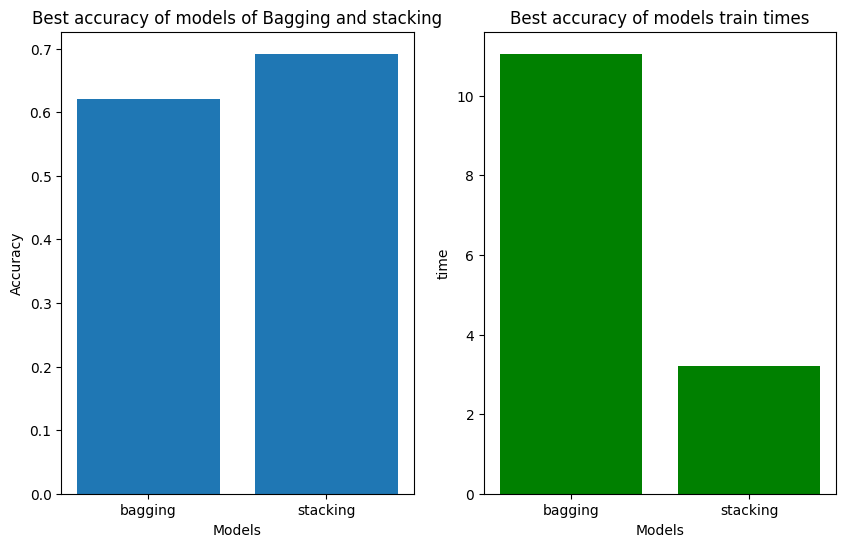

In [121]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(['bagging','stacking'],[acc_b,acc_s])
plt.title('Best accuracy of models of Bagging and stacking')
plt.xlabel('Models')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.bar(['bagging','stacking'],[time_b, time_s], color='green')
plt.title('Best accuracy of models train times')
plt.xlabel('Models')
plt.ylabel('time')
plt.show()

## Regrassion Models

### Housing Dataset preprocessing

In [19]:
X_data_m = pd.read_csv('/content/drive/MyDrive/SMAI_Google colab/HousingData.csv')
print("The shape of the data:",X_data_m.shape)
print(X_data_m.columns)
#Nan value replaced by mean of the feature
for i in X_data_m.columns:
    X_data_m[i].fillna(X_data_m[i].mean(), inplace=True)
X_data_m

The shape of the data: (506, 14)
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000,22.0


Text(0, 0.5, 'Count')

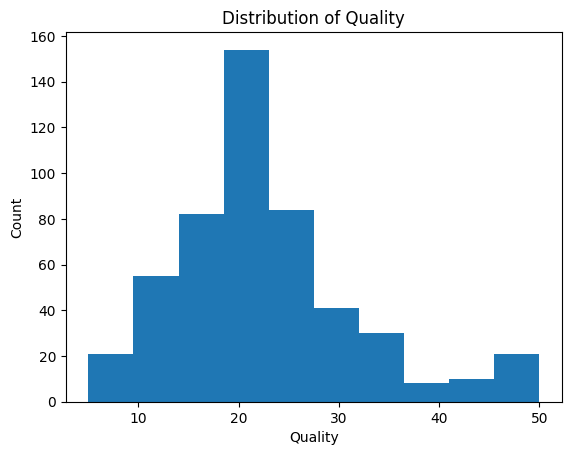

In [ ]:
X_data_m["MEDV"].sort_index().plot(kind='hist')
plt.title('Distribution of Quality')
plt.xlabel('Quality')
plt.ylabel('Count')

In [20]:
Y_data_h = X_data_m['MEDV']
X_data_h_n = X_data_m.drop('MEDV',axis=1)

# X_data_h_n = preprocessing.normalize(X_data_h_n,axis=0)
# std = preprocessing.StandardScaler()
# X_data_w_n = std.fit_transform(X=X_data_h_n)

X_train_t, X_test_h, Y_train_t, Y_test_h = train_test_split(X_data_h_n,Y_data_h,test_size=0.15,random_state=1)
X_train_h, X_valid_h,Y_train_h, Y_valid_h = train_test_split(X_train_t,Y_train_t,test_size=0.176,random_state=1)

std = preprocessing.StandardScaler()
X_train_h = std.fit_transform(X=X_train_h)
X_test_h = std.fit_transform(X=X_test_h)
X_valid_h = std.fit_transform(X=X_valid_h)
print("Shape of the train, test and validaton data:",X_train_h.shape,X_test_h.shape,X_valid_h.shape)
print("Shape of the train, test and validaton label:",Y_train_h.shape,Y_test_h.shape,Y_valid_h.shape)

Shape of the train, test and validaton data: (354, 13) (76, 13) (76, 13)
Shape of the train, test and validaton label: (354,) (76,) (76,)


### Decision Trees Regression

In [36]:
#Decision Trees Regression
def Decision_trees_regression(hy_param,X_train, Y_train, X_valid, Y_valid):
    model = tree.DecisionTreeRegressor(max_depth=hy_param[0], max_features=hy_param[1],criterion=hy_param[2],random_state=10)
    model = model.fit(X_train, Y_train)
    predicted_value = model.predict(X_valid)
    mse = mean_squared_error(Y_valid, predicted_value)
    # mse = np.sum((predicted_value-Y_valid)**2)/len(predicted_value)
    return mse

In [ ]:
from itertools import product
h_param = {
        'Max_depth' : [3,5,10,20,30],
        'Max_features' : [3,5,7,9,11],
        'criterion' : ['squared_error', 'absolute_error']
        }
hyper_param = list(product(*h_param.values()))
MSE = []
f1_micro = []
f1_macro = []
for i in hyper_param:
    mse = Decision_trees_regression(i,X_train_h, Y_train_h, X_valid_h, Y_valid_h)
    MSE.append(mse)

Hayper parameter index number for minmum MSE: 22
The best hyperparameters of the Decision tree: (10, 5, 'squared_error') 
The MSE: 12.209062087951796


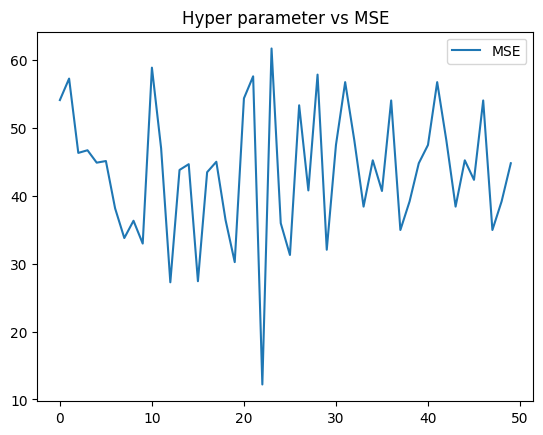

In [ ]:
plt.plot(np.arange(len(MSE)),MSE,label="MSE")
plt.title("Hyper parameter vs MSE")
plt.legend()
Index_of_best_hyper_param = np.argmin(MSE)
print("Hayper parameter index number for minmum MSE:",Index_of_best_hyper_param)
print("The best hyperparameters of the Decision tree:",hyper_param[Index_of_best_hyper_param],
"\nThe MSE:",MSE[Index_of_best_hyper_param])

### Linear Regression

In [105]:
class Linear_regration:
    def __init__(self, learning_rate = 0.01, epoch = 100,thresold_value = 0.000001,random_state=None):
        self.learning_rate = learning_rate
        self.epoch = epoch
        self.loss = []
        self.thresold_value = thresold_value
        self.random_state = random_state
    def fit(self, X_train, Y_train):
        np.random.seed(self.random_state)
        Y_train = np.array(Y_train).reshape(-1,1)
        X_train = np.insert(X_train,0,1,axis=1)
        self.weights = np.full((1, X_train.shape[1]),0.00001)  #1xm

        i = 0
        while(i<self.epoch):
            p_k = self.predic_prob_(X_train)
            self.loss.append(self.MSE(Y_train,p_k))

            error = Y_train - p_k
            dj_dw = np.dot(error.T, X_train)   #x*(y-y_pred)  #1xn * nxm  = 1xm
            update_w = dj_dw*self.learning_rate
            self.weights += update_w

            if np.abs(update_w).max()<self.thresold_value:
                break

            i+=1

    def predic_prob_(self,X):
        z = np.dot(X,self.weights.T).reshape(-1,1)
        return z               #nx1

    def predict(self, X_test,internal = 0):
        if internal==0:
            X_test = np.insert(X_test,0,1,axis=1)
        p_prob = self.predic_prob_(X_test)
        return p_prob

    def MSE(self, Y, p_probs):
        return np.square(np.subtract(Y, p_probs)).mean()

Text(0, 0.5, 'Loss')

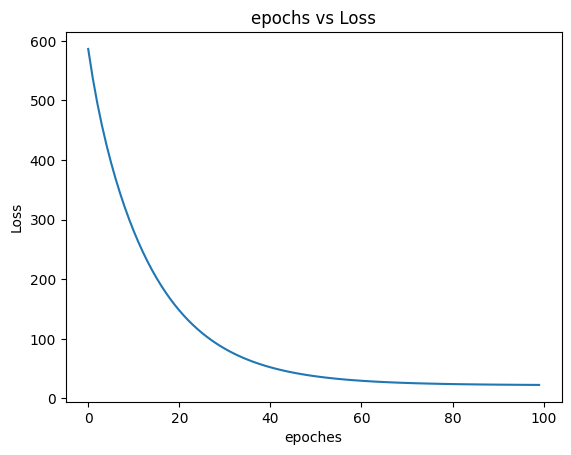

In [ ]:
model = Linear_regration(epoch=100,learning_rate=0.0001)
model.fit(np.array(X_train_h,dtype=float),np.array(Y_train_h,dtype=float))
plt.plot(model.loss)
plt.title("epochs vs Loss")
plt.xlabel("epoches")
plt.ylabel("Loss")

In [ ]:
h_param = {
        'learning_rate': [0.0005,0.0001,0.00005,0.00001],
        'epochs' : [1000,1500,2000,2500,3000,3500]
        }

hyper_param = list(product(*h_param.values()))
loss = []
MSE_valid_loss = []
for i in hyper_param:
        model = Linear_regration(learning_rate = i[0], epoch = i[1])
        model.fit(np.array(X_train_h,dtype=float),np.array(Y_train_h,dtype=float))
        Actual_value = Y_valid_h
        predicted_value = model.predict(X_valid_h)
        mse = mean_squared_error(Y_valid_h, predicted_value)

        # mse = np.sum((predicted_value - np.array(Y_valid_h).reshape(-1,1))**2)/len(predicted_value)
        MSE_valid_loss.append(mse)
        l = np.mean(model.loss)
        loss.append(l)

Hyper parameter index number for minmum MSE: 0
The best hyperparameters of the Linear Regression: (0.0005, 1000) 
The MSE: [29.00406212]


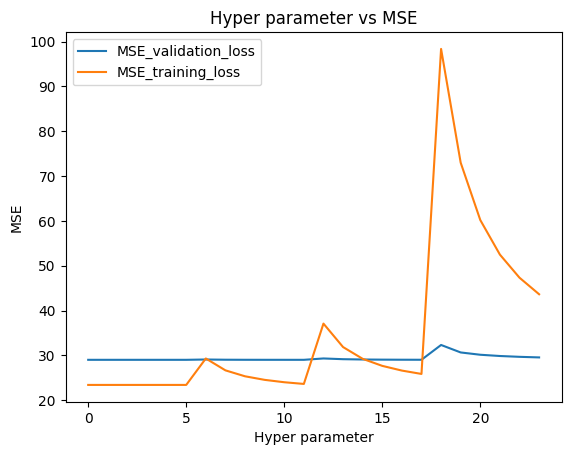

In [ ]:

MSE = pd.DataFrame(MSE_valid_loss).interpolate(method='linear')
MSE = np.array(MSE)

for i in range(len(MSE)):
    if MSE[i]== np.nan :
        MSE[i]==100    #to avoid Nan values
plt.plot(np.arange(len(MSE)),MSE,label="MSE_validation_loss")
plt.plot(np.arange(len(loss)),loss,label="MSE_training_loss")
plt.title("Hyper parameter vs MSE")
plt.xlabel("Hyper parameter")
plt.ylabel("MSE")
plt.legend()
Index_of_best_hyper_param = np.argmin(MSE)
print("Hyper parameter index number for minmum MSE:",Index_of_best_hyper_param)
print("The best hyperparameters of the Linear Regression:",hyper_param[Index_of_best_hyper_param],
"\nThe MSE:",MSE[Index_of_best_hyper_param])

### MLP Regression

In [38]:
class multi_layer_perceptron_regression:
    def __init__(self, learning_rate, activation_function,input_size,output_size=1, hidden_layers = [8], optimiser = 'MBGD',epochs = 500,batch_size = 50,random_state=None):
        self.learning_rate = learning_rate
        self.activation_function = activation_function
        self.input_size = input_size              # no of features in the input dataset
        self.output_size = output_size
        self.hidden_layers = hidden_layers
        self.optimiser = optimiser
        self.batch_size = batch_size
        self.epochs = epochs
        self.random_state = random_state
        self.weights, self.biases = self.intialize_weight_and_bias(self.random_state)
        self.loss = None
        self.losses = []

    def fit(self,X,y):
        np.random.seed(self.random_state)
        if self.output_size == 1:
            loss_function = self.MSE_Loss
        else:
            loss_function = self.categorical_cross_entropy_loss

        for epoch in range(self.epochs):

            if self.optimiser=='BGD':
                output, activations = self.forward(X)
                self.backward(X, y, output, activations)

            elif self.optimiser=='MBGD':
                output = np.empty((0, self.output_size))
                num_batches = X.shape[0] // self.batch_size
                X_batches = np.array_split(X, num_batches)
                Y_batches = np.array_split(y,num_batches)

                for i in range(num_batches):
                    X_batche = X_batches[i]
                    Y_batche = Y_batches[i]
                    out, activations = self.forward(X_batche)
                    self.backward(X_batche, Y_batche, out, activations)
                    output = np.append(output, out, axis=0)

            elif self.optimiser=='SGD':
                output = np.empty((0, self.output_size))
                num_batches = X.shape[0] // 1
                X_batches = np.array_split(X, num_batches)
                Y_batches = np.array_split(y,num_batches)
                for i in range(X.shape[0]):
                    out, activations = self.forward(X_batches[i])
                    self.backward(X_batches[i], Y_batches[i], out, activations)
                    output = np.append(output, out, axis=0)

            else:
                raise ValueError("Invalid optimizer!")
            self.loss = loss_function(np.array(y).reshape(X.shape[0],1), output)
            self.losses.append(self.loss)
            # # if epoch % 100 == 0:
            #     print(f"Epoch {epoch}, Loss: {loss}")

    def intialize_weight_and_bias(self, r):
        weights = []
        biases = []
        np.random.seed(r)
        weight = np.random.randn(self.input_size, self.hidden_layers[0])
        bias = np.zeros((self.hidden_layers[0],1))
        weights.append(weight)
        biases.append(bias)
        np.random.seed(42)

        for i in range(1, len(self.hidden_layers)):
            weight = np.random.randn(self.hidden_layers[i-1], self.hidden_layers[i])
            bias = np.zeros((self.hidden_layers[i],1))
            weights.append(weight)
            biases.append(bias)

        weight = np.random.randn(self.hidden_layers[-1],self.output_size)
        bias = np.zeros((self.output_size,1))
        weights.append(weight)
        biases.append(bias)

        return weights, biases

    def forward(self, X_train):
        activations = []  #output of layears
        layer_input = X_train #inpute of all layears

        for i in range(len(self.hidden_layers)):
            weighted_sum = np.dot(layer_input ,self.weights[i])
            weighted_sum_n = weighted_sum + np.array(self.biases[i]).T     #check
            activation = self.activation_func(weighted_sum_n)

            activations.append(activation)
            layer_input = activation

        output = np.dot(layer_input,self.weights[-1])
        output += np.array(self.biases[-1]).T   #check
        # if self.output_size == 1:
        #     output = self.sigmoid(output)
        # else:
        #     output = self.softmax(output)
        # print("output shape:",output.shape)
        return output, activations

    def softmax(self,X):
        exp_X = np.exp(X - np.max(X))  # Stability fix
        return exp_X / np.sum(exp_X, axis=1, keepdims=True).reshape(-1,1)

    def activation_func(self, weighted_sum):
        if self.activation_function == 'ReLU':
            return np.maximum(0, weighted_sum)

        elif (self.activation_function == 'Sigmoid'):
            return 1 / (1 + np.exp(-weighted_sum))

        elif (self.activation_function == 'Tanh'):
            return np.tanh(weighted_sum)

        else:
            raise ValueError("Invalid Activation Function.")
            return

    def activation_func_derivative(self,X):
        if self.activation_function == 'ReLU' :
            return (X > 0).astype(float)

        elif (self.activation_function == 'Sigmoid'):
            return X * (1 - X)

        elif (self.activation_function == 'Tanh'):
            return (1 - X**2)

        else:
            raise ValueError("Invalid Activation Function.")
            return

    def backward(self,X,Y, output, activations):
        gradient_weights = []
        gradient_biases = []
        error_delta = output-np.array(Y).reshape(X.shape[0],1)

        gradient_weight = np.dot(activations[-1].T,error_delta)
        gradient_bias = np.sum(error_delta)

        gradient_weights.append(gradient_weight)
        gradient_biases.append(gradient_bias)

        for i in range(len(self.hidden_layers), 0, -1):
            error = np.dot( error_delta, self.weights[i].T)

            activation_derivative = self.activation_func_derivative(activations[i-1])
            if np.any(np.isnan(error)) or np.any(np.isnan(activation_derivative)):
                # Handle the case of NaN values here, for example:
                error_delta = np.zeros_like(error)
            else:
                error_delta = error * activation_derivative

            # error_delta = error * activation_derivative
            gradient_weight = np.dot(activations[i - 2].T, error_delta) if (i-1) > 0 else np.dot(X.T,error_delta)
            gradient_bias = np.sum(error_delta)

            gradient_weights.append(gradient_weight)
            gradient_biases.append(gradient_bias)

        for i in range(len(self.hidden_layers)+1):
            self.weights[i] -= self.learning_rate * gradient_weights[len(self.hidden_layers)-i]
            self.biases[i] -= self.learning_rate * gradient_biases[len(self.hidden_layers)-i]
        # print(self.weights[1])
    def MSE_Loss(self,Y, p_probs):
        return np.square(np.subtract(Y, p_probs)).mean()
    def binary_cross_entropy_loss(self, y_true, y_pred):
        epsilon = 1e-14  # Small constant to prevent log(0 and -ve)
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def categorical_cross_entropy_loss(self, y_true, y_pred):
        epsilon = 1e-14  # Small constant to prevent log(0)
        return -np.sum(y_true * np.log(y_pred + epsilon)) / len(y_true)

    def predict(self,X_test):
        output, _ = self.forward(X_test)
        return output

    def Mean_square_error(self, X_test, Y_test):
        X_test = np.array(X_test)
        Y_test = np.array(Y_test).reshape(X_test.shape[0],1)
        y_pred = self.predict(X_test)
        MSE = np.sum((y_pred - Y_test)**2)/Y_test.shape[0]
        return MSE
    def Root_mean_square_error(self, X_test, Y_test):
        MSE = self.Mean_square_error(X_test, Y_test)
        return MSE**(0.5)
    def Root_squared(self,X_test,Y_test):
        X_test = np.array(X_test)
        Y_test = np.array(Y_test).reshape(X_test.shape[0],1)
        MSE = self.Mean_square_error(X_test, Y_test)
        d = np.sum((Y_test-np.mean(Y_test))**2)
        return 1-MSE/d

MSE=12.039348628008515, RMSE=3.469776452166409, R_squared=0.9984105866111035


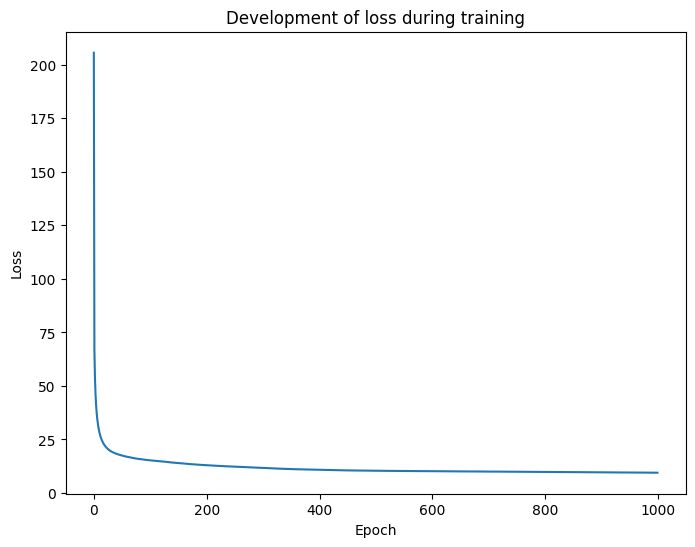

In [ ]:
model = multi_layer_perceptron_regression(learning_rate = 0.0001, activation_function = 'ReLU',input_size = 13,output_size=1, hidden_layers = [9], optimiser = 'MBGD', epochs=1000,batch_size = 50)
model.fit(X_train_h,Y_train_h)
MSE = model.Mean_square_error(X_valid_h,Y_valid_h)
RMSE = model.Root_mean_square_error(X_valid_h,Y_valid_h)
R_s = model.Root_squared(X_valid_h,Y_valid_h)
print(f"MSE={MSE}, RMSE={RMSE}, R_squared={R_s}")
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(len(model.losses)),model.losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Development of loss during training")
plt.show()

In [ ]:
h_param = {
        'learning_rate': [0.0001],
        'epochs' : [2000,3000,4000],
        'hidden_layer_neurons': [[13],[17]],
        'activation_functions' : ['ReLU', 'Sigmoid', 'Tanh'],
        'optimization_techniques' : ['BGD', 'MBGD']
        }

hyper_param = list(product(*h_param.values()))
MSE_valid_loss = []
loss = []
for i in hyper_param:
        model = multi_layer_perceptron_regression(learning_rate=i[0], hidden_layers = i[2],activation_function = i[3],optimiser=i[4],input_size = 13,output_size = 1,epochs=i[1])
        model.fit(X_train_h,Y_train_h)
        # Actual_value = Y_valid_h
        # mse = model.Mean_square_error(X_test=X_valid_h, Y_test=Y_valid_h)
        Actual_value = np.array(Y_valid_h).reshape(X_valid_h.shape[0],1)
        predicted_value = model.predict(X_valid_h)
        mse = mean_squared_error(Actual_value, predicted_value)
        # predicted_value = model.predict_values(X_valid_h)
        # mse = np.sum((predicted_value - np.array(Y_valid_h).reshape(-1,1))**2)/len(predicted_value)
        MSE_valid_loss.append(mse)
        l = np.mean(model.losses)
        loss.append(l)

Hyper parameter index number for minmum MSE: 1
The best hyperparameters of the Linear Regression: (0.0001, 2000, [13], 'ReLU', 'MBGD') 
The MSE: [11.33477488]


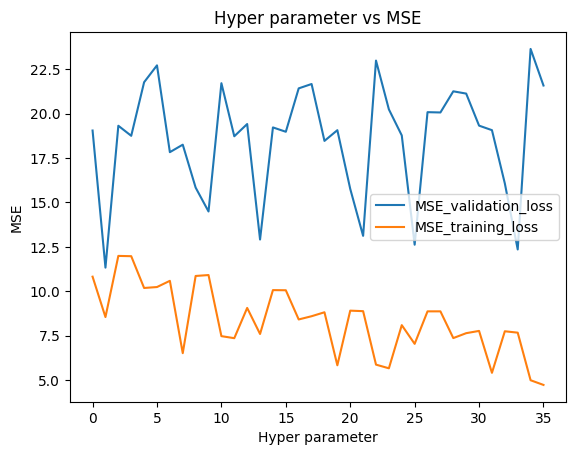

In [ ]:

MSE = pd.DataFrame(MSE_valid_loss).interpolate(method='linear')
MSE = np.array(MSE)

for i in range(len(MSE)):
    if MSE[i]== np.nan :
        MSE[i]==100    #to avoid Nan values
plt.plot(np.arange(len(MSE)),MSE,label="MSE_validation_loss")
plt.plot(np.arange(len(loss)),loss,label="MSE_training_loss")
plt.title("Hyper parameter vs MSE")
plt.xlabel("Hyper parameter")
plt.ylabel("MSE")
plt.legend()
Index_of_best_hyper_param = np.argmin(MSE)
print("Hyper parameter index number for minmum MSE:",Index_of_best_hyper_param)
print("The best hyperparameters of the Linear Regression:",hyper_param[Index_of_best_hyper_param],
"\nThe MSE:",MSE[Index_of_best_hyper_param])

1. Design a function that performs the bagging methodology of ensemble
learning by taking as input the following parameters:
<br>• Base Estimator Model
<br>– Decision Trees, logistic regression, MLP
<br>• Number of Estimators
<br>– Variable according to the base-estimator
<br>• Fraction/Number of Samples
<br>– 0.15, 0.25, 0.5, 0.75, 1.0
<br>• Bootstrap
<br>– True: Sampling with replacement is performed
<br>– False: Sampling without replacement is performed
<br>• Voting Mechanism:
<br>– Hard Voting: Every classifier has equal weight in the final output
<br>– Soft Voting: The final output is weighed by the confidence of the
base estimator models.

## 3.2 Bagging for Resgression

In [23]:
class BaggingRegression:
    def __init__(self, base_estimator, n_estimators=10, max_samples=1.0, random_state=None, bootstrap=True, voting = 'hard'):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.max_samples = max_samples
        self.random_state = random_state
        self.bootstrap = bootstrap
        self.voting = voting
        self.estimators = []

    def fit(self, X, y):
        np.random.seed(self.random_state)
        self.estimators = []

        for _ in range(self.n_estimators):
            # Randomly sample a subset of the training data
            if self.bootstrap:
                sample_indices = np.random.choice(len(X), size=int(self.max_samples * len(X)), replace=True)
            else:
                sample_indices = np.random.choice(len(X), size=int(self.max_samples * len(X)), replace=False)

            X_sampled = X[sample_indices]
            y_sampled = y[sample_indices]

            # Create a new instance of the base estimator
            estimator = self.base_estimator

            # Train the base estimator on the sampled data
            estimator.fit(X_sampled, y_sampled)

            self.estimators.append(estimator)

    def predict(self, X,Y):
        # Make predictions using each base estimator
        predictions = [estimator.predict(X) for estimator in self.estimators]
        # Use soft voting for classification (average probabilities)
        MSE =  []
        if self.voting == 'soft':

          for pred in predictions:
            MSE.append(mean_squared_error(Y, pred))
          sum_MSE = np.sum(MSE)
          prd = []
          for i in range(len(predictions)):
            prd.append(predictions[i]*MSE[i])
          ensemble_probabilities = np.sum(prd,axis=0)/sum_MSE
            # ensemble_probabilities = np.array(MSE).reshape(len(predictions),1)*predictions/sum_MSE
            # ensemble_probabilities = sum(val * weight for val, weight in zip(predictions, np.array(MSE).reshape(1,len(predictions))))
        if self.voting == "hard":
          ensemble_probabilities = np.array(predictions).mean(axis=0)
        return ensemble_probabilities

#### 3.2.2
For ease, assume the best hyper-parameters from sub-task 1 and train
ensemble models across all combinations of parameters specified above
and report the best performing models

In [ ]:
h_param = {
        'base_estimators': [tree.DecisionTreeRegressor(max_depth=10, max_features=5,criterion='squared_error',random_state=10),
Linear_regration(learning_rate = 0.0005, epoch = 3500),
multi_layer_perceptron_regression(learning_rate=0.0005, activation_function = 'Tanh',input_size = 13,output_size = 1, hidden_layers = [17],epochs = 4000,optimiser='MBGD')],
        'num_estimators' : [10, 20, 30],
        'sample_sizes': [0.15, 0.25, 0.5, 0.75, 1.0],
        'bootstrap_options' : [False,True],
        'voting' : ['soft','hard']
        }

hyper_param_r = list(product(*h_param.values()))
MSE_n = []
MSE_DT = []
MSE_LR = []
MSE_MLP = []
j = 0
for i in hyper_param_r:
        bagging_model = BaggingRegression(base_estimator = i[0], n_estimators=i[1], max_samples=i[2], random_state=42, bootstrap=i[3], voting=i[4])
        Y_train_h_n = np.array(Y_train_h).reshape(X_train_h.shape[0],1)
        bagging_model.fit(X_train_h, Y_train_h_n)
        Actual_value = np.array(Y_valid_h).reshape(X_valid_h.shape[0],1)

        predicted_value = bagging_model.predict(X_valid_h, Actual_value)
        MSE = mean_squared_error(Actual_value, predicted_value)
        # MSE = np.sum((predicted_value - Actual_value)**2)/len(predicted_value)
        MSE_n.append(MSE)
        if j//60 == 0:
                MSE_DT.append(MSE)
        if j//60 == 1:
                MSE_LR.append(MSE)
        if j//60 == 2:
                MSE_MLP.append(MSE)
        j = j+1
        # print(MSE)

In [ ]:
min_MSE_index = np.argmin(MSE_n)
print(f"The hyperparameters index for the minimum MSE = {min_MSE_index},\nThe hyperparameters for the minimum MSE = {hyper_param_r[min_MSE_index]},\nThe min MSE = {MSE_n[min_MSE_index]}")
print("\n")

min_MSE_index_DT = np.argmin(MSE_DT)
print(f"The hyperparameters index of decision trees for the minimum MSE = {min_MSE_index_DT},\nThe hyperparameters of decision trees for the minimum MSE = {hyper_param_r[min_MSE_index_DT]},\nThe decision trees min MSE = {MSE_DT[min_MSE_index_DT]}")
print("\n")

min_MSE_index_LR = np.argmin(MSE_LR)
print(f"The hyperparameters index of linear regression for the minimum MSE = {min_MSE_index_LR+60},\nThe hyperparameters of linear regression for the minimum MSE = {hyper_param_r[min_MSE_index_LR+60]},\nThe linear regression min MSE = {MSE_LR[min_MSE_index_LR]}")
print("\n")

min_MSE_index_MLP = np.argmin(MSE_MLP)
print(f"The hyperparameters index of MLP for the minimum MSE = {min_MSE_index_MLP+120},\nThe hyperparameters of MLP for the minimum MSE = {hyper_param_r[min_MSE_index_MLP+120]},\nThe MLP min MSE = {MSE_MLP[min_MSE_index_MLP]}")
print("\n")

The hyperparameters index for the minimum MSE = 54,
The hyperparameters for the minimum MSE = (DecisionTreeRegressor(max_depth=10, max_features=5, random_state=10), 30, 0.75, True, 'soft'),
The min MSE = 11.232705715670324


The hyperparameters index of decision trees for the minimum MSE = 54,
The hyperparameters of decision trees for the minimum MSE = (DecisionTreeRegressor(max_depth=10, max_features=5, random_state=10), 30, 0.75, True, 'soft'),
The decision trees min MSE = 11.232705715670324


The hyperparameters index of linear regression for the minimum MSE = 111,
The hyperparameters of linear regression for the minimum MSE = (<__main__.Linear_regration object at 0x793ae0ea4370>, 30, 0.5, True, 'hard'),
The linear regression min MSE = 27.03155846305061


The hyperparameters index of MLP for the minimum MSE = 144,
The hyperparameters of MLP for the minimum MSE = (<__main__.multi_layer_perceptron_regression object at 0x793ae0ea4220>, 20, 0.25, False, 'soft'),
The MLP min MSE = 25.712

In [ ]:
plt.plot(np.array(MSE_n))
plt.title("Hyper parameter vs MSE decision tree")
plt.xlabel("Hyper parameters")
plt.ylabel("MSE")

#### 3.2.3
Plot a heatmap for the accuracies obtained by each class of base estimator
models across Fraction of Samples and Number of Estimators (Keep other
parameters constant and to your choice)

In [ ]:
j = 0
MSE_DT_n = np.zeros(int(len(MSE_DT)/4))
MSE_LR_n = np.zeros(int(len(MSE_DT)/4))
MSE_MLP_n = np.zeros(int(len(MSE_DT)/4))
for i in range(len(MSE_DT)):
    if i%4 ==0:
        MSE_DT_n[j] = MSE_DT[i]
        MSE_LR_n[j] = MSE_LR[i]
        MSE_MLP_n[j] = MSE_MLP[i]
        j = j + 1

(3, 5, 3)


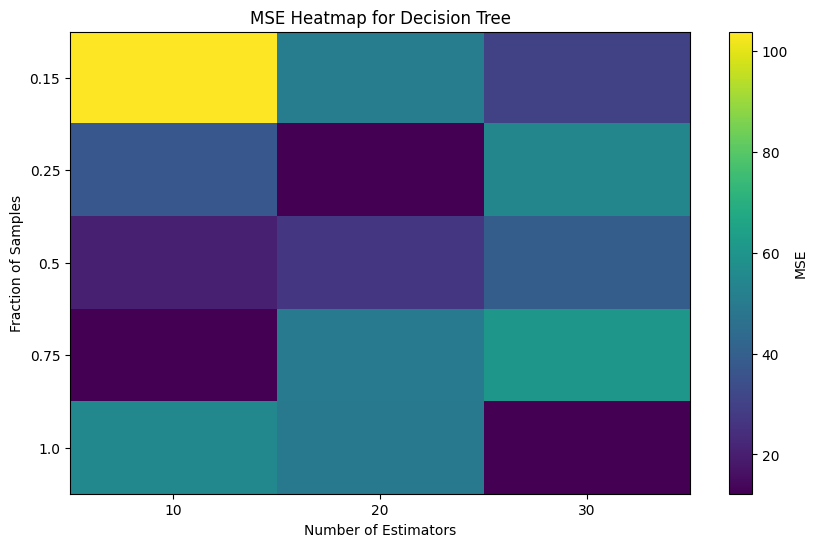

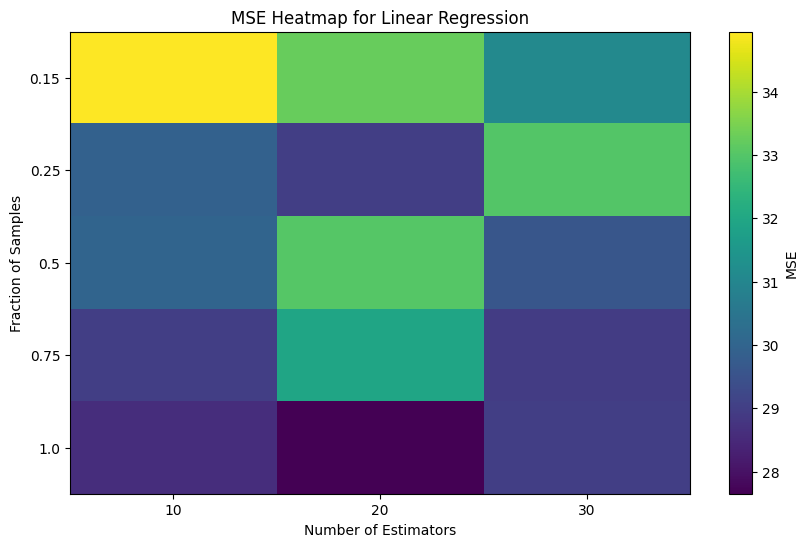

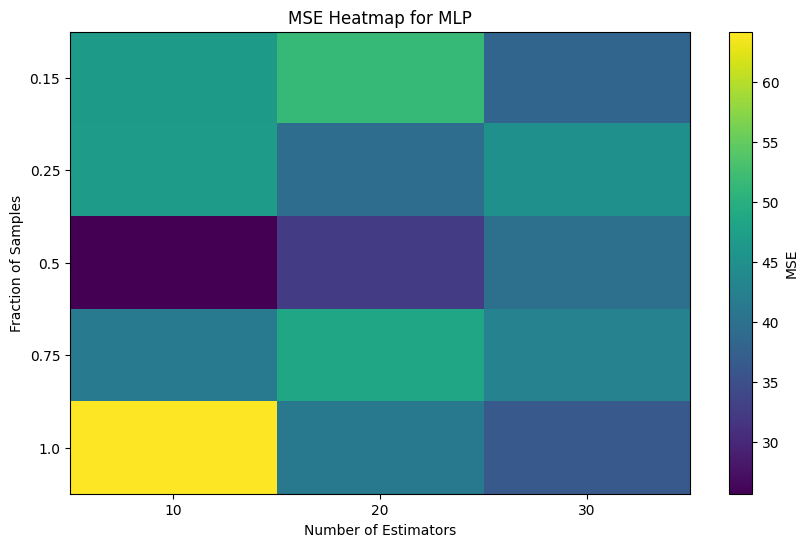

In [ ]:

base_ests = ['Decision Tree', 'Linear Regression', 'MLP']
fraction_samples = [0.15, 0.25, 0.5, 0.75, 1.0]
num_estimators = [10, 20, 30]
MSE_scores = np.array([MSE_DT_n, MSE_LR_n, MSE_MLP_n]).reshape(3,5,3)
print(MSE_scores.shape)
for i in range(len(base_ests)):
    # Create the heatmap
    plt.figure(figsize=(10, 6))
    plt.imshow(MSE_scores[i], cmap='viridis', aspect='auto')

    plt.colorbar(label='MSE')
    plt.xticks(np.arange(len(num_estimators)), num_estimators)
    plt.yticks(np.arange(len(fraction_samples)), fraction_samples)
    plt.xlabel('Number of Estimators')
    plt.ylabel('Fraction of Samples')
    plt.title(f'MSE Heatmap for {base_ests[i]}')

    plt.show()

#### 3.2.4
Compare the performance of each model in List 1 models with the bestperforming ensemble model of the same class with a single side-by-side
histogram

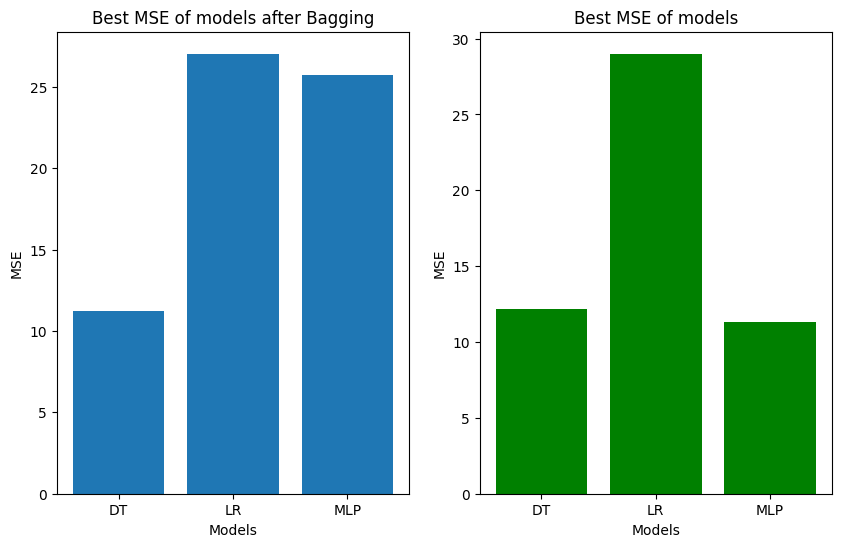

In [ ]:
Best_MSE_bagg = np.array([MSE_n[min_MSE_index_DT],MSE_n[min_MSE_index_LR+60],MSE_n[min_MSE_index_MLP+120]])
Best_MSE_models = np.array([12.2,29,11.33])
list_of_models  =['DT','LR','MLP']

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(list_of_models,Best_MSE_bagg)
plt.title('Best MSE of models after Bagging')
plt.xlabel('Models')
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
plt.bar(list_of_models,Best_MSE_models, color='green')
plt.title('Best MSE of models')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.show()

## 3.3 Stacking for regression

In [123]:
class StackingBlendingRegression:

  def __init__(self, base_estimators, meta_estimator, stack_method = 'blending',random_state = None):
      self.base_estimators = base_estimators
      self.meta_estimator = meta_estimator
      self.stack_method = stack_method
      self.random_state = random_state

  def fit(self, X_train, Y_train, X_hold, Y_hold,n_fold=4):
    np.random.seed(self.random_state)
    # self.estimators = []
    hold_pred = []
    self.base_estimators_t = []

    if self.stack_method=='blending':
      hold_preds = np.empty((0,1),float)
      is_array_empty = True
      for estimator in self.base_estimators:
        estimator.fit(X_train, Y_train)
        if is_array_empty == True:
          hold_preds = np.append(hold_preds, estimator.predict(X_hold), axis=None)
          is_array_empty = False
          hold_preds = np.array(hold_preds).reshape(len(X_hold),-1)
        else:
          hold_preds = np.append(hold_preds, estimator.predict(X_hold), axis=1)

        self.base_estimators_t.append(estimator)
      self.meta_estimator.fit(hold_preds,Y_hold)

    elif self.stack_method == 'stacking':
      folds=KFold(n_splits=n_fold)
      train_preds=np.empty((0,1),float)
      is_empty_array2 = True
      for estimator in self.base_estimators:
        train_pred=np.empty((0,1),float)
        Y_train_pred=np.empty((0,1),float)
        is_empty_array1 = True

        for train_indices,val_indices in folds.split(X_train,Y_train):
          x_train,x_val=X_train[train_indices],X_train[val_indices]
          y_train,y_val=Y_train[train_indices],Y_train[val_indices]
          estimator.fit(x_train,y_train)
          if is_empty_array1==True:
            train_pred=np.append(train_pred,estimator.predict(x_val),axis=None)
            Y_train_pred=np.append(Y_train_pred,y_val,axis=None)
            is_empty_array1 = False
            train_pred = np.array(train_pred).reshape(len(x_val),-1)
            Y_train_pred = np.array(Y_train_pred).reshape(len(x_val),-1)
          else:
            train_pred=np.append(train_pred,np.array(estimator.predict(x_val)).reshape(len(x_val),-1),axis=0)
            Y_train_pred=np.append(Y_train_pred,y_val,axis=0)

        if is_empty_array2==True:
          train_preds = np.append(train_preds, train_pred, axis=None)
          is_empty_array2=False
          train_preds = np.array(train_preds).reshape(len(X_train),-1)
        else:
          train_preds = np.append(train_preds, train_pred, axis=1)
        self.base_estimators_t.append(estimator)

      self.meta_estimator.fit(train_preds,Y_train_pred)

    else:
      raise ValueError("Invalid Stacking method.")

  def predict(self,X_test):
    test_preds = np.empty((0,1),float)
    is_array_empty = True
    for estimator in self.base_estimators_t:
      if is_array_empty == True:
        test_preds = np.append(test_preds, estimator.predict(X_test), axis=None)
        is_array_empty = False
        test_preds = np.array(test_preds).reshape(len(X_test),-1)
      else:
        test_preds = np.append(test_preds, estimator.predict(X_test), axis=1)

    return self.meta_estimator.predict(test_preds)

In [124]:
random_state = 10    #10 ,19
from sklearn.linear_model import LinearRegression
base_estimators = [tree.DecisionTreeRegressor(max_depth=10, max_features=5,criterion='squared_error',random_state=random_state),
                   Linear_regration(learning_rate = 0.0005, epoch = 3500,random_state = random_state),
                   multi_layer_perceptron_regression(learning_rate=0.0005, activation_function = 'Tanh',input_size = 13,output_size = 1, hidden_layers = [17],epochs = 4000,optimiser='MBGD',random_state=random_state)]

h_param = {
        'meta_estimator' : [tree.DecisionTreeRegressor(max_depth=10, max_features=5,criterion='squared_error',random_state=random_state),
                            Linear_regration(learning_rate = 0.000001, epoch = 3500, random_state=random_state)],
        'stack_method': ['stacking','blending']
        }

hyper_param = list(product(*h_param.values()))
j = 0
MSE_n = []
for i in hyper_param:
        stacking_model = StackingBlendingRegression(base_estimators = base_estimators , meta_estimator = i[0], stack_method = i[1],random_state=random_state)
        Y_train_h_n = np.array(Y_train_h).reshape(X_train_h.shape[0],1)
        Y_valid_h_n = np.array(Y_valid_h).reshape(X_valid_h.shape[0],1)
        stacking_model.fit(X_train_h, Y_train_h_n, X_valid_h, Y_valid_h_n)

        Actual_value = np.array(Y_test_h).reshape(len(X_test_h),1)
        predicted_value = stacking_model.predict(X_test_h)

        imputer = SimpleImputer(strategy='mean')
        nan = np.nan
        predicted_value = imputer.fit_transform(np.array(predicted_value).reshape(len(predicted_value),-1))
        predicted_value = np.array(predicted_value).reshape(len(predicted_value),-1)
        MSE = mean_squared_error(Actual_value, predicted_value)
        MSE_n.append(MSE)
        print(f"The hyperparameters index = {j},\nThe hyperparameters = {hyper_param[j]},\nThe MSE = {MSE_n[j]}")
        print("\n")
        j = j+1
min_MSE_index = np.argmin(MSE_n)
print(f"The hyperparameters index for the maximum accuracy = {min_MSE_index},\nThe hyperparameters for the maximum accuracy = {hyper_param[min_MSE_index]},\nThe max accuracy = {MSE_n[min_MSE_index]}")


The hyperparameters index = 0,
The hyperparameters = (DecisionTreeRegressor(max_depth=10, max_features=5, random_state=10), 'stacking'),
The MSE = 28.61642195040462


The hyperparameters index = 1,
The hyperparameters = (DecisionTreeRegressor(max_depth=10, max_features=5, random_state=10), 'blending'),
The MSE = 17.990625


The hyperparameters index = 2,
The hyperparameters = (<__main__.Linear_regration object at 0x7cf73cd2ee00>, 'stacking'),
The MSE = 26.019860591877933


The hyperparameters index = 3,
The hyperparameters = (<__main__.Linear_regration object at 0x7cf73cd2ee00>, 'blending'),
The MSE = 12.975580200705965


The hyperparameters index for the maximum accuracy = 3,
The hyperparameters for the maximum accuracy = (<__main__.Linear_regration object at 0x7cf73cd2ee00>, 'blending'),
The max accuracy = 12.975580200705965


In [125]:
import time
#best bagging model
start = time.time()
i = [tree.DecisionTreeRegressor(max_depth=10, max_features=5, random_state=10), 30, 0.75, True, 'soft']
bagging_model = BaggingRegression(base_estimator = i[0], n_estimators=i[1], max_samples=i[2], random_state=42, bootstrap=i[3], voting=i[4])
Y_train_h_n = np.array(Y_train_h).reshape(X_train_h.shape[0],1)
bagging_model.fit(X_train_h, Y_train_h_n)
end = time.time()
Actual_value = np.array(Y_valid_h).reshape(X_valid_h.shape[0],1)

predicted_value = bagging_model.predict(X_valid_h, Actual_value)
MSE_b = mean_squared_error(Actual_value, predicted_value)
time_ba = end-start
print("MSE of the best bagging Regresor:",MSE_b,'\nThe run time of the begging regresor:',time_ba)

#best stacking model
start = time.time()
i = hyper_param[min_MSE_index]
stacking_model = StackingBlendingRegression(base_estimators = base_estimators , meta_estimator = i[0], stack_method = i[1],random_state=random_state)
Y_train_h_n = np.array(Y_train_h).reshape(X_train_h.shape[0],1)
Y_valid_h_n = np.array(Y_valid_h).reshape(X_valid_h.shape[0],1)
stacking_model.fit(X_train_h, Y_train_h_n, X_valid_h, Y_valid_h_n)
end = time.time()
Actual_value = np.array(Y_test_h).reshape(len(X_test_h),1)
predicted_value = stacking_model.predict(X_test_h)
imputer = SimpleImputer(strategy='mean')
nan = np.nan
predicted_value = imputer.fit_transform(np.array(predicted_value).reshape(len(predicted_value),-1))
predicted_value = np.array(predicted_value).reshape(len(predicted_value),-1)
MSE_s = mean_squared_error(Actual_value, predicted_value)
time_st = end-start
print("MSE of the best stacking regresor:",MSE_s,'\nThe run time of the stacking regresor:',time_st)

MSE of the best bagging Regresor: 11.232705715670324 
The run time of the begging regresor: 0.11792588233947754
MSE of the best stacking regresor: 13.0403189466571 
The run time of the stacking regresor: 6.981564998626709


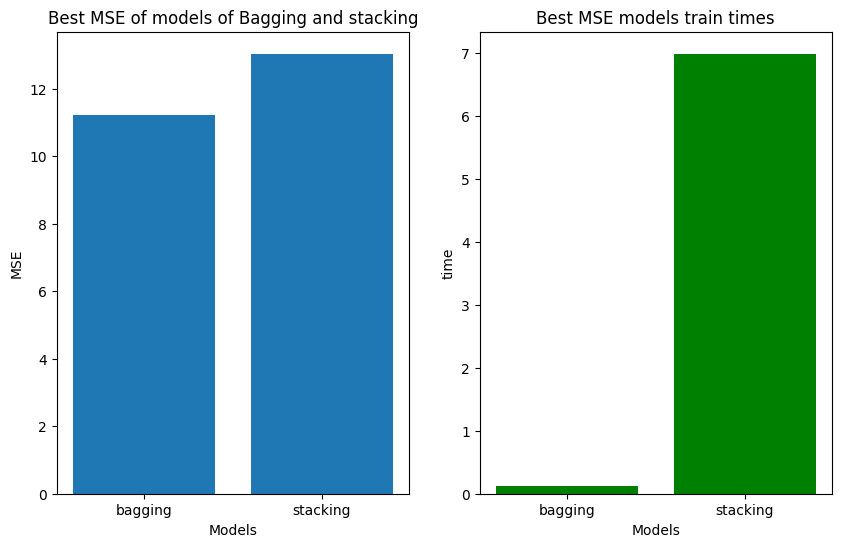

In [126]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(['bagging','stacking'],[MSE_b,MSE_s])
plt.title('Best MSE of models of Bagging and stacking')
plt.xlabel('Models')
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
plt.bar(['bagging','stacking'],[time_ba, time_st], color='green')
plt.title('Best MSE models train times')
plt.xlabel('Models')
plt.ylabel('time')
plt.show()